In [14]:
import numpy as np 
import pandas as pd 
import geopandas as geo
import matplotlib.pyplot as plt

import random
from math import radians, cos, sin, sqrt, atan2
import math

In [15]:
#create random list of coords
def generate_random_gps_position():
    """Generate a random GPS position with latitude and longitude."""
    latitude  = random.uniform(-90, 90)
    longitude = random.uniform(-180, 180)
    #magnitude = calculate_vector_magnitude(latitude,longitude)
    return [latitude, longitude]

def rand_coord(list_size = 10):
    my_coords=list()
    for _ in range(list_size):
        my_coords.append(generate_random_gps_position()) 
    my_sorted_coords = sort_coordinates_by_dispersion(my_coords)
    return my_sorted_coords
 
def calculate_vector_magnitude(x, y):
    magnitude = math.sqrt(x**2 + y**2)
    return magnitude

def plot_dict_elements(data_dict):
    """
    Plots elements of a dictionary with vectors from the origin to each point.
    The first element of each list is used as the x-axis, the second element as the y-axis,
    and the dictionary key as the marker label.
    
    Parameters:
    data_dict (dict): Dictionary where each key has a list with at least two elements.
    """
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    for key, value in data_dict.items():
        # Extract the x and y coordinates
        x, y = value[0], value[1]
        # Plot the vector from origin to the point
        plt.arrow(0, 0, x, y, head_width=1, head_length=2, fc='blue', ec='blue', length_includes_head=True)
        # Plot each point and use the key as the label
        plt.scatter(x, y, label=f'Key {key}')
        # Annotate the point with its key
        plt.text(x, y, f' {key}', fontsize=9)
    
    # Adding labels and title for clarity
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Vectors from Origin to Points')
    plt.xlim(left=min([value[0] for value in data_dict.values()])-10, right=max([value[0] for value in data_dict.values()])+10)
    plt.ylim(bottom=min([value[1] for value in data_dict.values()])-10, top=max([value[1] for value in data_dict.values()])+10)
    plt.grid(True)
    plt.legend()
    plt.show()

def sort_coordinates_by_dispersion(coordinates):
    """
    Sorts a list of coordinates by the dispersion of either the x (longitude)
    or y (latitude) components, selecting the one with greater dispersion
    as the true order.

    Parameters:
    coordinates (list of tuples/lists): The input coordinates to sort,
    where each coordinate is a tuple or list of [longitude, latitude].

    Returns:
    list: The sorted coordinates based on the component with greater dispersion.
    """
    # Extract the x and y components
    x_components = [coord[0] for coord in coordinates]
    y_components = [coord[1] for coord in coordinates]

    # Sort coordinates based on x and y components
    sorted_by_x = sorted(coordinates, key=lambda coord: coord[0])
    sorted_by_y = sorted(coordinates, key=lambda coord: coord[1])

    # Measure dispersion (standard deviation) for both x and y components
    std_dev_x = np.std(x_components)
    std_dev_y = np.std(y_components)

    # Select the sorting order with the greater dispersion
    if std_dev_x > std_dev_y:
        return sorted_by_x
    else:
        return sorted_by_y

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

def sort_gps_coordinates(gps_coordinates):

    sorted_coordinates = sorted(gps_coordinates,key=calcular_magnitudes(gps_coordinates))
    return sorted_coordinates
def calcular_magnitudes(vectores):
    """
    Calcula la magnitud de cada vector en una lista de vectores 2D.
    
    Parameters:
    vectores (list): Lista de vectores, donde cada vector es una lista [x, y].
    
    Returns:
    list: Lista de magnitudes de los vectores.
    """
    magnitudes = [math.sqrt(x**2 + y**2) for x, y in vectores]
    return magnitudes

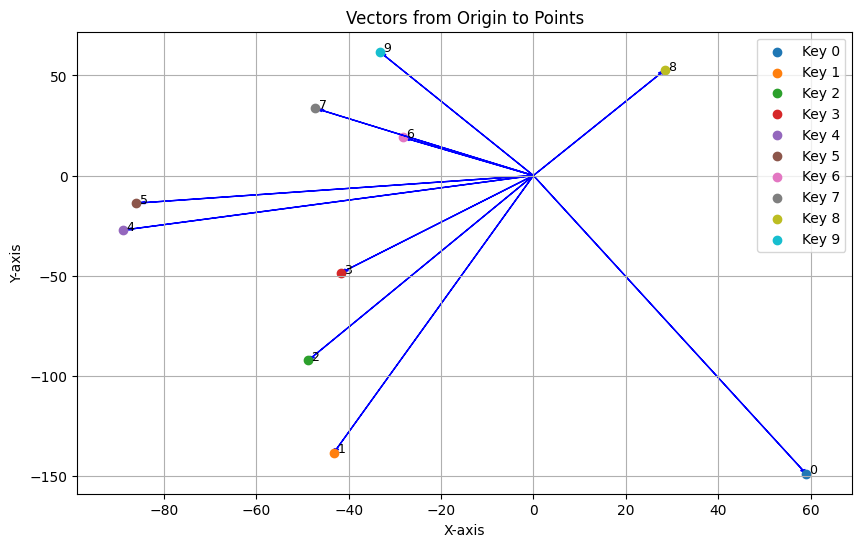

In [16]:
my_dict = dict()
coords  = rand_coord()
for c in range(len(coords)):
    my_dict[c]=coords[c]
plot_dict_elements(my_dict)

In [51]:

print(calcular_magnitudes(coords))

[81.47943583171951, 83.99034479384916, 165.1097731937915, 175.47739757226043, 138.58397487569178, 22.335542830917216, 154.57565201563423, 163.3989324238403, 122.90133774661192, 152.740613023045]


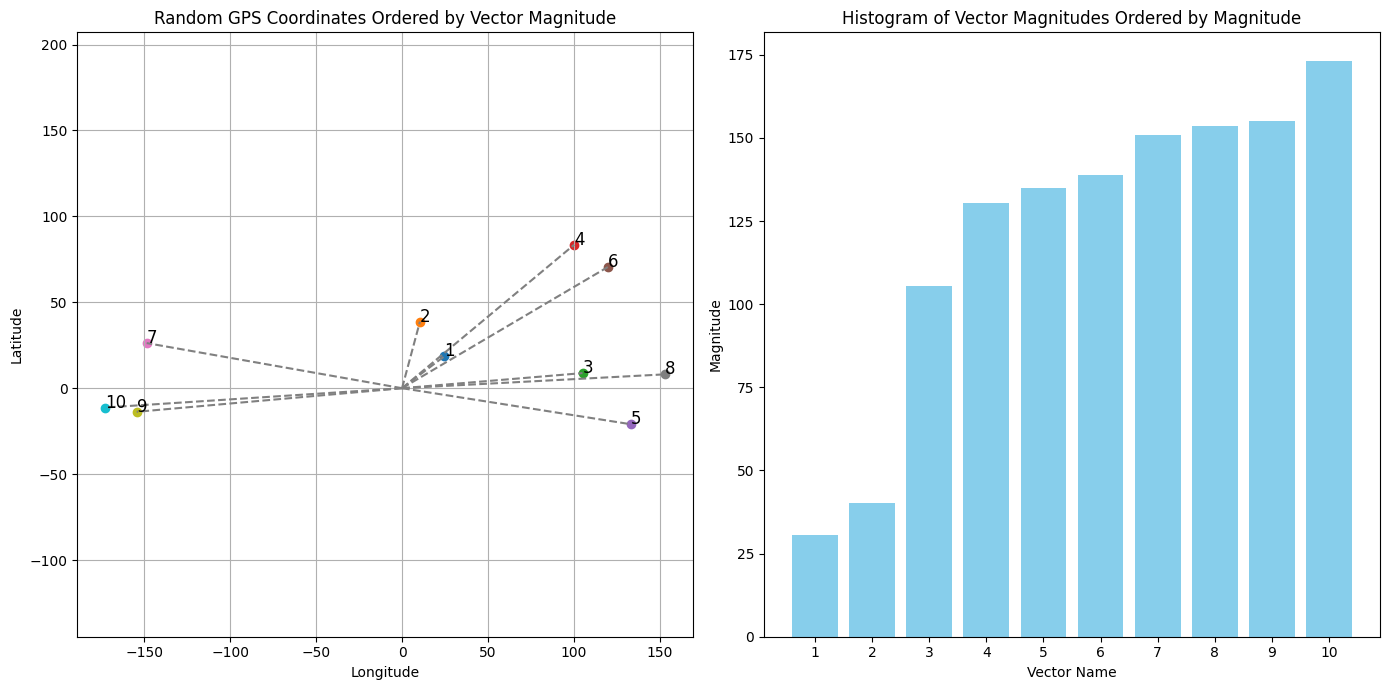

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_random_coordinates(seed=0, num_points=10):
    """Generate random GPS coordinates."""
    np.random.seed(seed)  # Fix the seed for reproducibility
    latitudes = np.random.uniform(-90, 90, num_points)
    longitudes = np.random.uniform(-180, 180, num_points)
    return list(zip(latitudes, longitudes))

def calculate_magnitude(coordinates):
    """Calculate the magnitude of each vector."""
    return [np.sqrt(lat**2 + lon**2) for lat, lon in coordinates]

def sort_coordinates_by_magnitude(coordinates, magnitudes):
    """Sort the coordinates based on their magnitudes."""
    return [coord for _, coord in sorted(zip(magnitudes, coordinates), key=lambda x: x[0])]

def plot_coordinates_and_vectors(coordinates):
    """Plot the coordinates and vectors on a map."""
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    for i, (lat, lon) in enumerate(coordinates):
        plt.scatter(lon, lat)
        plt.text(lon, lat, str(i+1), fontsize=12)
        plt.plot([0, lon], [0, lat], linestyle='--', color='gray')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Random GPS Coordinates Ordered by Vector Magnitude')
    plt.grid(True)
    plt.axis('equal')

def plot_magnitude_histogram(magnitudes):
    """Plot a histogram of the magnitudes of the vectors."""
    plt.subplot(1, 2, 2)
    vector_names = [str(i+1) for i in range(len(magnitudes))]
    plt.bar(vector_names, magnitudes, color='skyblue')
    plt.xlabel('Vector Name')
    plt.ylabel('Magnitude')
    plt.title('Histogram of Vector Magnitudes Ordered by Magnitude')

# Main execution
coordinates = generate_random_coordinates()
magnitudes = calculate_magnitude(coordinates)
coordinates_sorted_by_magnitude = sort_coordinates_by_magnitude(coordinates, magnitudes)
magnitudes_sorted = sorted(magnitudes)

plot_coordinates_and_vectors(coordinates_sorted_by_magnitude)
plot_magnitude_histogram(magnitudes_sorted)
plt.tight_layout()
plt.show()


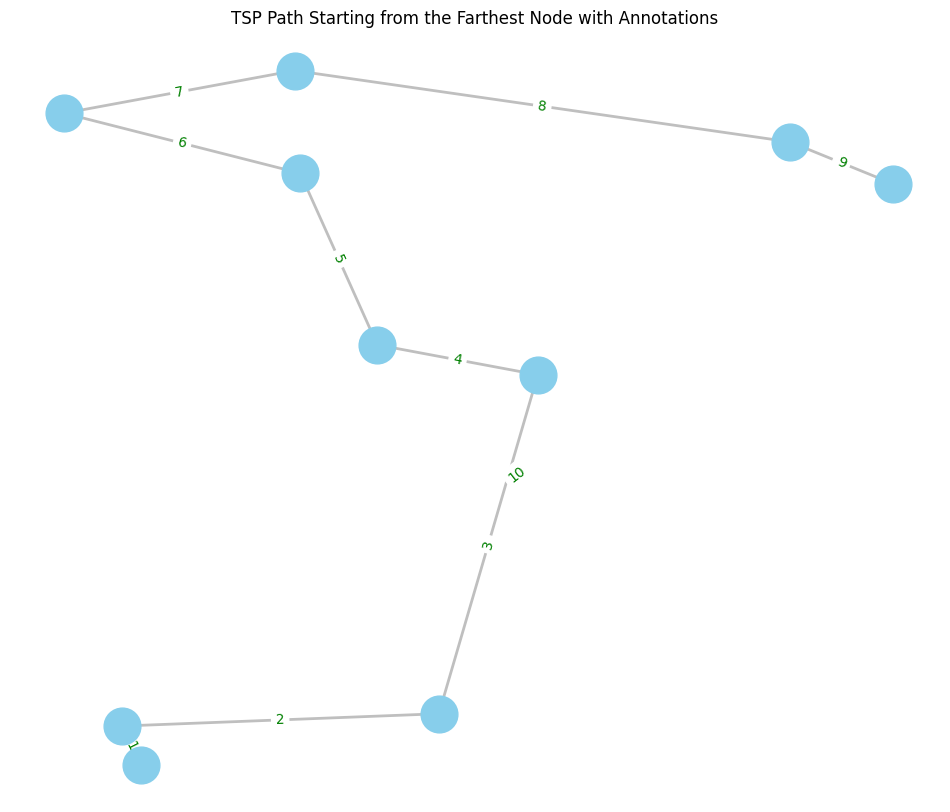

In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from itertools import permutations

def find_farthest_node(coordinates):
    """
    Find the index of the node that is the farthest on average from all other nodes.
    
    Args:
    - coordinates: A list of tuples/lists representing the coordinates of the points.
    
    Returns:
    - int: The index of the farthest node.
    """
    distance_matrix = squareform(pdist(coordinates, 'euclidean'))
    avg_distances = np.mean(distance_matrix, axis=1)
    return np.argmax(avg_distances)


def solve_tsp_and_plot_with_annotations(coordinates):
    """
    Solve the TSP starting from the farthest node, plot the shortest path, and
    annotate the graph with node numbers and the order number over the edges.
    
    Args:
    - coordinates: A list of tuples/lists representing the coordinates of the points.
    """
    # Create a complete graph from the coordinates
    G = nx.complete_graph(len(coordinates))
    for i, coord1 in enumerate(coordinates):
        for j, coord2 in enumerate(coordinates):
            if i != j:
                distance = np.linalg.norm(np.array(coord1) - np.array(coord2))
                G.edges[i, j]['weight'] = distance
    
    # Find the farthest node
    farthest_node = find_farthest_node(coordinates)
    
    # Solve TSP - Using the greedy approach as an example
    cycle = nx.approximation.greedy_tsp(G, source=farthest_node)
    
    # Plot the path with annotations
    plt.figure(figsize=(12, 10))
    pos = {i: coord for i, coord in enumerate(coordinates)}
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue", label=True)
    edge_labels = {(cycle[i-1], cycle[i]): i for i in range(1, len(cycle))}
    # Draw edges
    for i in range(1, len(cycle)-1):
        nx.draw_networkx_edges(G, pos, edgelist=[(cycle[i-1], cycle[i])], width=2, alpha=0.5, edge_color="gray")
    
    # Draw edge labels (order of traversal)

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
    # Draw node labels
    #nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
    
    plt.title('TSP Path Starting from the Farthest Node with Annotations')
    plt.axis('off')
    plt.show()

solve_tsp_and_plot_with_annotations(coordinates_sorted_by_magnitude)


In [ ]:
#SAS Word generator
#EdE 
V = 20
d = 3.65


T-60   hombre parado senal
T-50-1 hombre trabajando 
P-140-1 no dos vias
P-60-D  linea de aprada 
P-B-1  barrera 
@ opcional 
PHR1:
"T60*T501*P1401*T60*P60DLPB1@LP60D*T60*P1401*T501*T60"

In [21]:
def add_gaussian_noise(number, noise_level=1):
    """
    Add Gaussian noise to a number.
    
    Parameters:
    - number: float, the original number to add noise to.
    - noise_level: float, the standard deviation of the Gaussian noise.
    
    Returns:
    - The number with added Gaussian noise.
    """
    noisy_number = number + np.random.normal(loc=0, scale=noise_level)
    return noisy_number

import random

def phrase_generator(n=500):
    my_doc=[]
    for _ in range(n):
        wz_type   = random.choice(["TCD005A","TCD005A"])#TCD005B
        d         = add_gaussian_noise(3.65)

        my_result = random.choices(['', '@'], [0.8, 0.2], k=1)[0]
        speed     = random.choice([10,20,30,40,50,60,70,80,90,100])

        if wz_type=="TCD005A":
            phrase = "T60*T501*P1401*T60*P60DLPB1@LP60D*T60*P1401*T501*T60"
            if speed<=60:
                L = add_gaussian_noise(10*d)
                B = add_gaussian_noise(50)
            else:
                L = add_gaussian_noise(20*d)
                B = add_gaussian_noise(75)
            
            phrase.replace("@",my_result)
            new_phrase = ""
            for char in phrase:
                if char == "*":
                    # Generar un nuevo valor de B para cada '*'
                    B = round(add_gaussian_noise(B),2)
                    new_phrase += str(B)
                elif char == "@":
                    new_phrase += "<=>"
                elif char == "L":
                    str(round(L/2,2))
                else:
                    new_phrase += char

        else:
            pass
        my_doc.append(new_phrase)
    return my_doc

my_doc = phrase_generator()

500


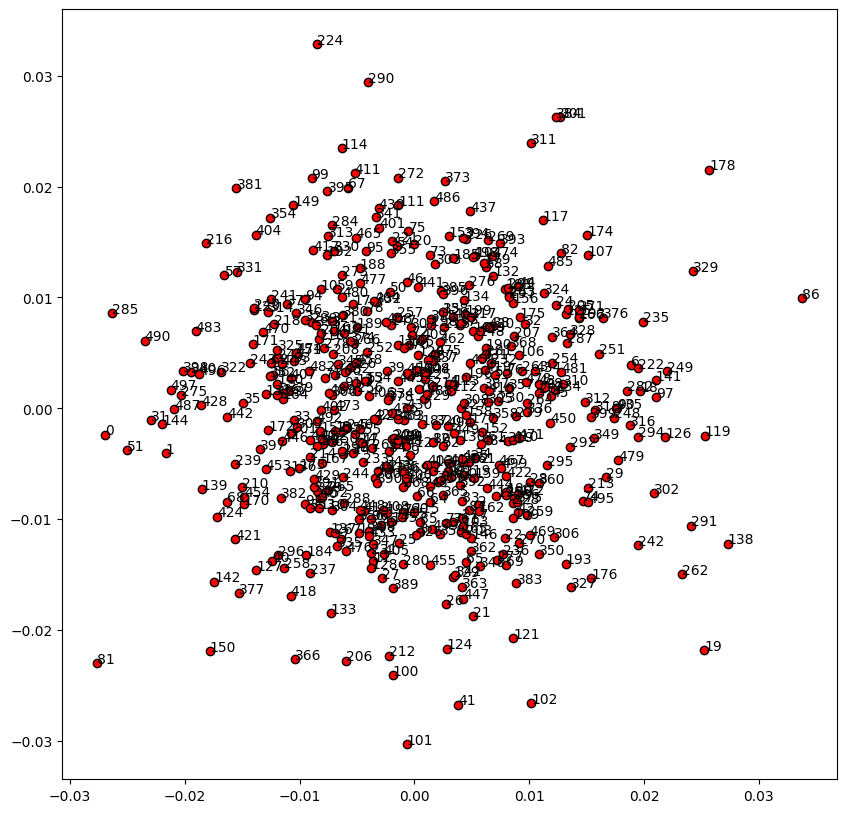

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA


tagged_data = [TaggedDocument(words=word.split(), tags=[str(i)]) for i, word in enumerate(my_doc)]
# Training the Doc2Vec model
doc_model   = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4, epochs=100)
doc_vectors = [doc_model.dv[str(i)] for i in range(len(tagged_data))]

pca = PCA(n_components=2)
jhgc  = pca.fit_transform(doc_vectors)
m
plt.figure(figsize=(10,10))
plt.scatter(reduced_doc_vectors[:,0], reduced_doc_vectors[:,1], edgecolors='k', c='r')

# Annotate the points on the graph with the sentence IDs
for i in range(len(reduced_doc_vectors)):
    plt.annotate(str(i), xy=(reduced_doc_vectors[i,0], reduced_doc_vectors[i,1]))

# Show the plot
plt.show()


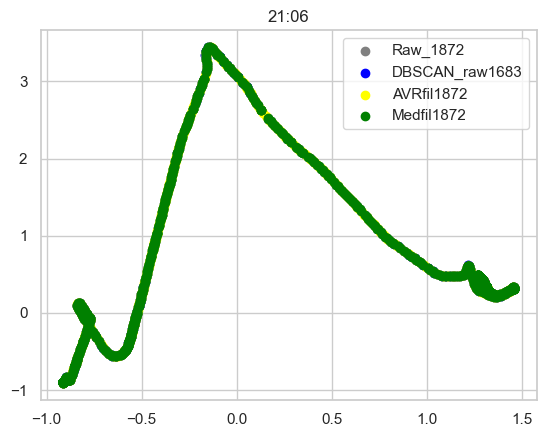

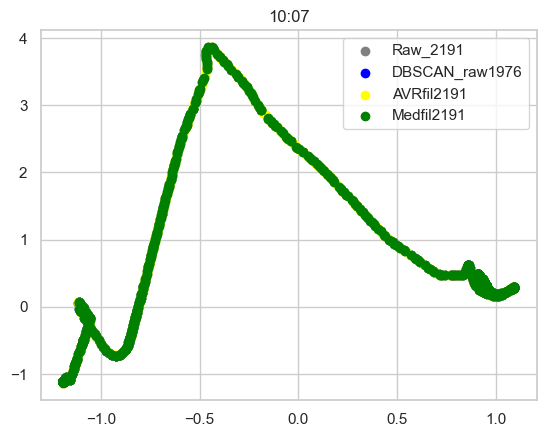

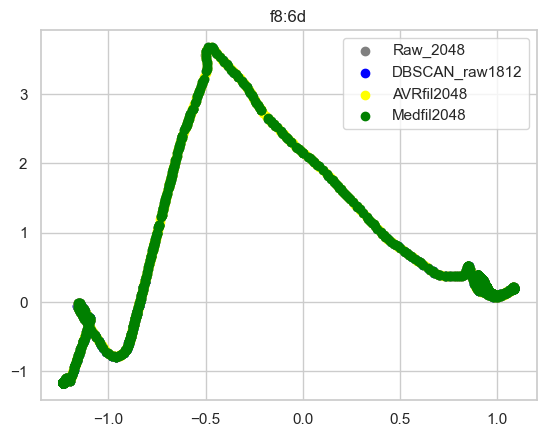

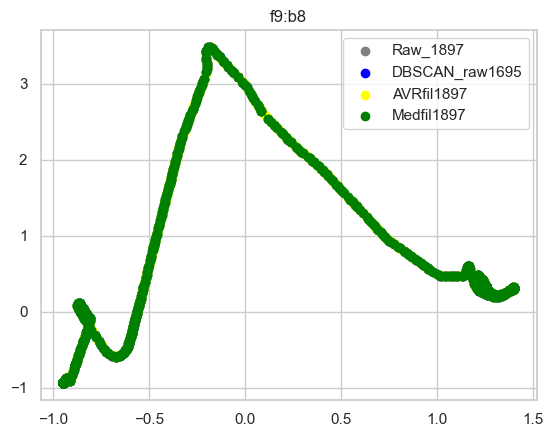

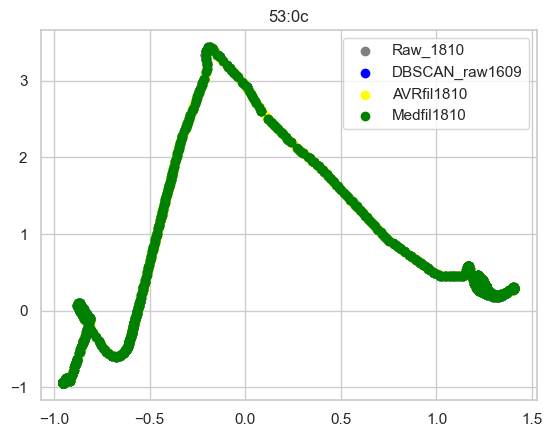

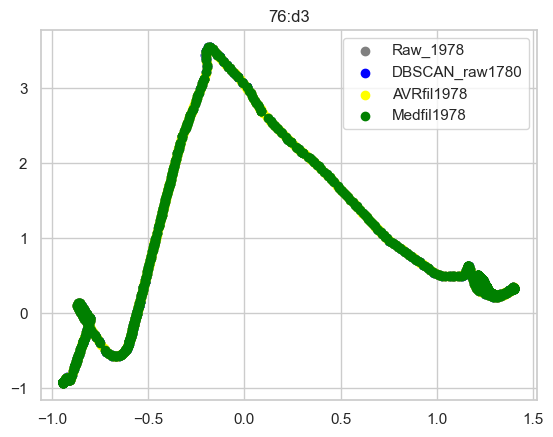

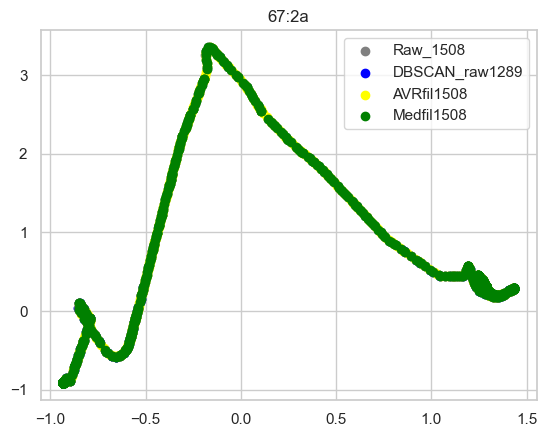

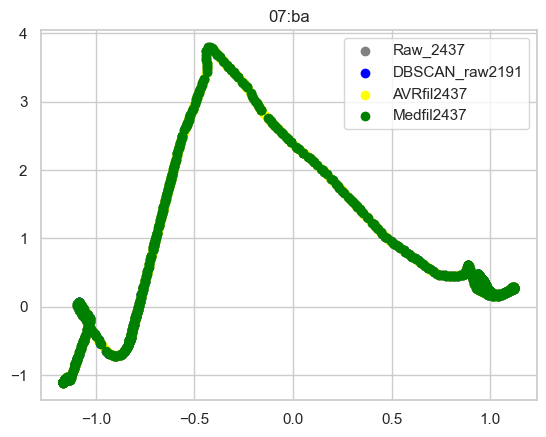

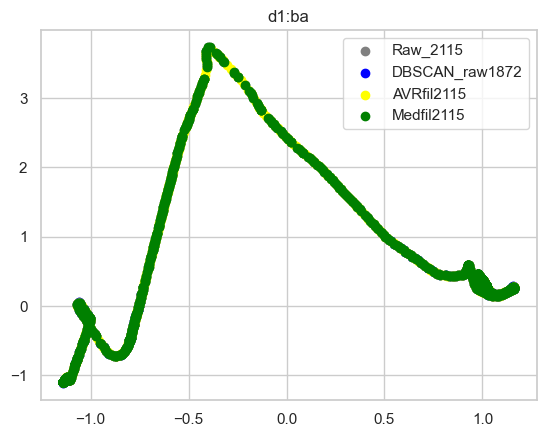

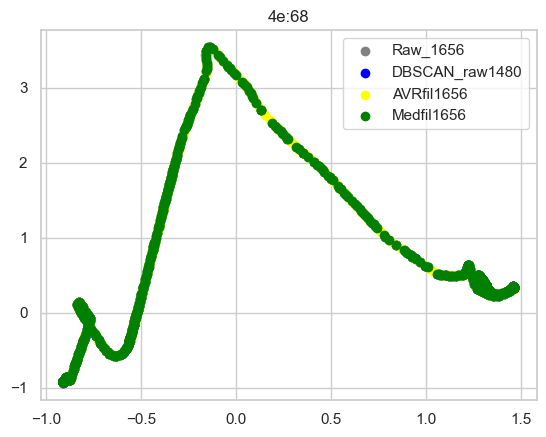

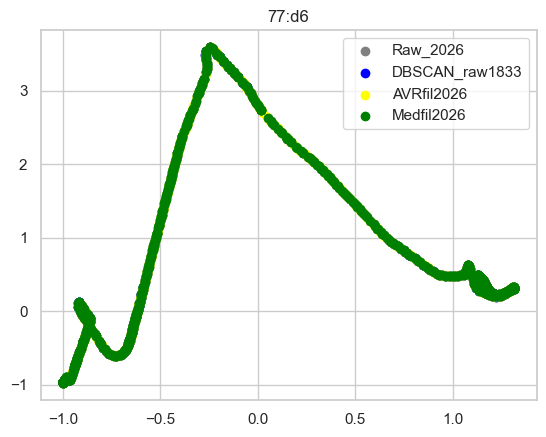

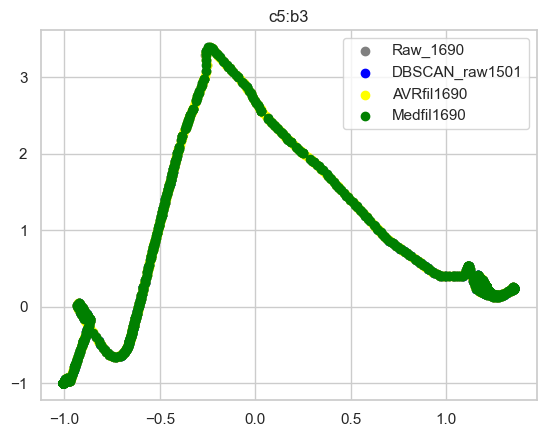

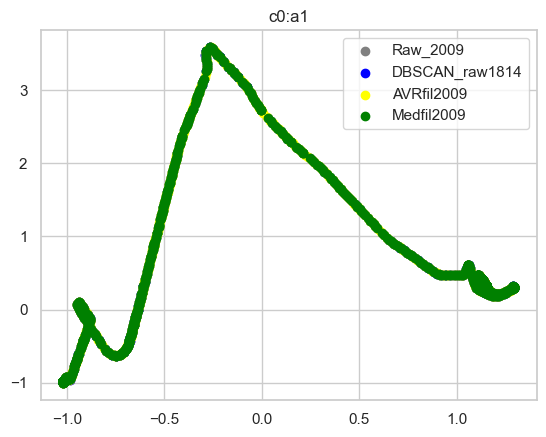

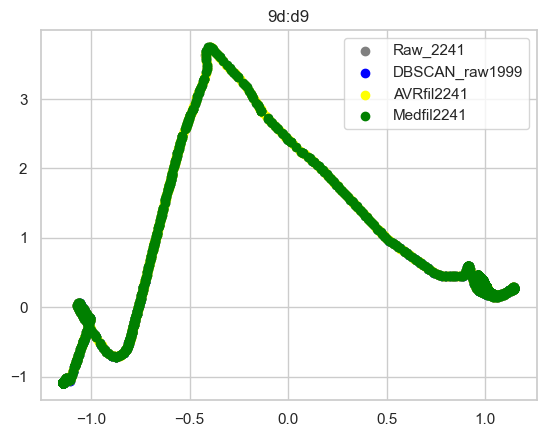

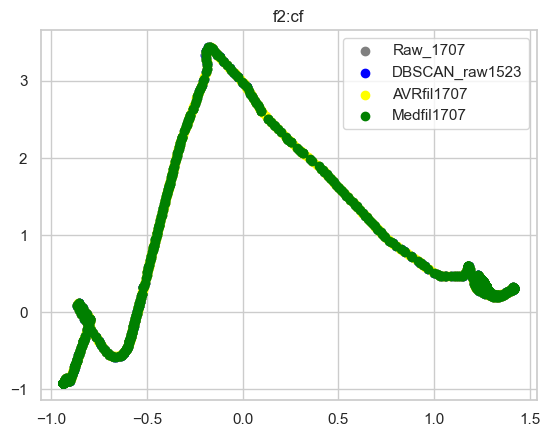

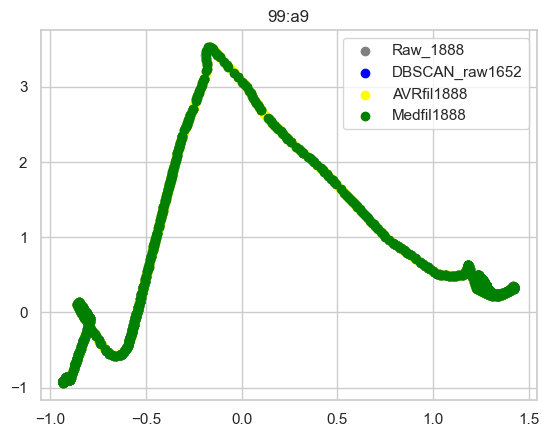

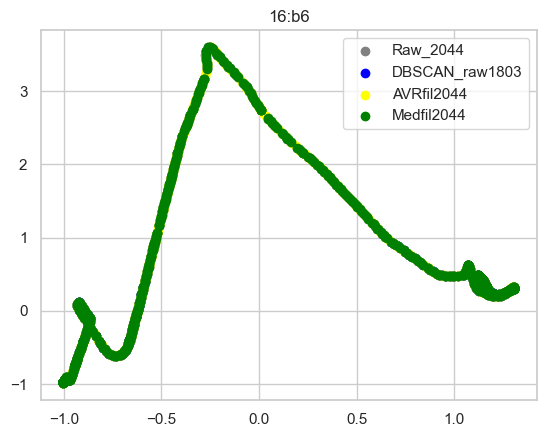

In [86]:
import json 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def median_filter(coordinates, n):
    # Ensure n is odd to maintain symmetry
    if n % 2 == 0:
        n += 1
    
    # Initialize the list of smoothed coordinates
    smoothed_coordinates = []

    # Apply the median filter
    for i in range(len(coordinates)):
        # Determine the start and end indices of the window
        start_index = max(0, i - n//2)
        end_index = min(len(coordinates), i + n//2 + 1)
        
        # Extract latitudes and longitudes within the window
        window_lats = [lat for lat, lon in coordinates[start_index:end_index]]
        window_lons = [lon for lat, lon in coordinates[start_index:end_index]]
        
        # Calculate the median latitude and longitude
        window_lats.sort()
        window_lons.sort()
        mid = len(window_lats) // 2
        if len(window_lats) % 2 == 0:
            median_lat = (window_lats[mid-1] + window_lats[mid]) / 2.0
            median_lon = (window_lons[mid-1] + window_lons[mid]) / 2.0
        else:
            median_lat = window_lats[mid]
            median_lon = window_lons[mid]
        
        # Add the smoothed coordinate to the list
        smoothed_coordinates.append((median_lat, median_lon))

    return smoothed_coordinates


def moving_average_filter(coordinates, n):
    # Ensure n is odd to maintain symmetry
    if n % 2 == 0:
        n += 1
    
    # Initialize the list of smoothed coordinates
    smoothed_coordinates = []

    # Apply the moving average filter
    for i in range(len(coordinates)):
        # Determine the start and end indices of the window
        start_index = max(0, i - n//2)
        end_index = min(len(coordinates), i + n//2 + 1)
        
        # Calculate the average latitude and longitude within the window
        avg_lat = sum(lat for lat, lon in coordinates[start_index:end_index]) / (end_index - start_index)
        avg_lon = sum(lon for lat, lon in coordinates[start_index:end_index]) / (end_index - start_index)
        
        # Add the smoothed coordinate to the list
        smoothed_coordinates.append((avg_lat, avg_lon))

    return smoothed_coordinates

def calculate_median(values):
    sorted_values = sorted(values)
    n = len(sorted_values)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_values[mid - 1] + sorted_values[mid]) / 2.0
    else:
        return sorted_values[mid]
    
def threshold_filter(coordinates, threshold_lat, threshold_lon):
    # Calculate the median latitude and longitude for the entire dataset for reference
    median_lat = calculate_median([lat for lat, _ in coordinates])
    median_lon = calculate_median([lon for _, lon in coordinates])
    
    # Initialize the list of filtered coordinates
    filtered_coordinates = []

    # Apply threshold filtering
    for lat, lon in coordinates:
        if abs(lat - median_lat) <= threshold_lat and abs(lon - median_lon) <= threshold_lon:
            filtered_coordinates.append((lat, lon))

    return filtered_coordinates
data  = []
with open("C:/Users/juan.david/projects/garda/data/logs_8668.txt", 'r') as file:
    for line in file:
        json_line = json.loads(line)
        
        data.append(json_line)

n_df  = pd.DataFrame(data, columns=['ID', 'Timestamp', 'Flag', 'RSSI_1', 'RSSI_2', 'RSSI_3', 'RSSI_4', 'Longitude', 'Latitude', 'Status'])
df    = n_df[(n_df['Latitude'] != 10) & (n_df['Longitude'] != 10)].reset_index(drop=True)
ids   = list(set(df.ID))
#my_id = ids[-1]
#incremental_list = [i for i in range(1, len(la) + 1)]
#gps_points = np.column_stack((la, lo))
#gps_points2 = np.column_stack((la, lo,incremental_list))

for my_id in ids:
    my_raw_data = df[df['ID']== my_id]

    la   = [float(lat) for lat in my_raw_data['Latitude']]
    lo   = [float(lon) for lon in my_raw_data['Longitude']]

    scaler            = StandardScaler()
    
    incremental_list = [i for i in range(1, len(la) + 1)]
    gps_points = np.column_stack((la, lo))
    gps_points2 = np.column_stack((la, lo,incremental_list))
    gps_points_scaled = scaler.fit_transform(gps_points)

    #Raw points
    plt.scatter([l[0] for l in gps_points_scaled],[l[1] for l in gps_points_scaled], c='grey', label='Raw_'+str(len(la)))
    #DBSCAN Raw
    dbscan   = DBSCAN(eps=0.3, min_samples=40)
    clusters = dbscan.fit(gps_points_scaled)
    mask = clusters.labels_ != -1  # Máscara para filtrar ruido
    plt.scatter(gps_points_scaled[mask, 0], gps_points_scaled[mask, 1], c='blue', label='DBSCAN_raw'+str(len(gps_points_scaled[mask, 0])))
    #AVR_fil
    smoothed_coordinates = moving_average_filter(gps_points_scaled,3)
    plt.scatter([l[0] for l in smoothed_coordinates],[l[1] for l in smoothed_coordinates], c='yellow', label='AVRfil'+str(len(smoothed_coordinates)))
    #Median_fil
    smoothed_coordinates = median_filter(gps_points_scaled,3)
    plt.scatter([l[0] for l in smoothed_coordinates],[l[1] for l in smoothed_coordinates], c='green', label='Medfil'+str(len(smoothed_coordinates)))

    plt.title(str(my_id))
    #plt.xlabel('Lon')
    #plt.ylabel('Lat')
    plt.legend()
    plt.show()


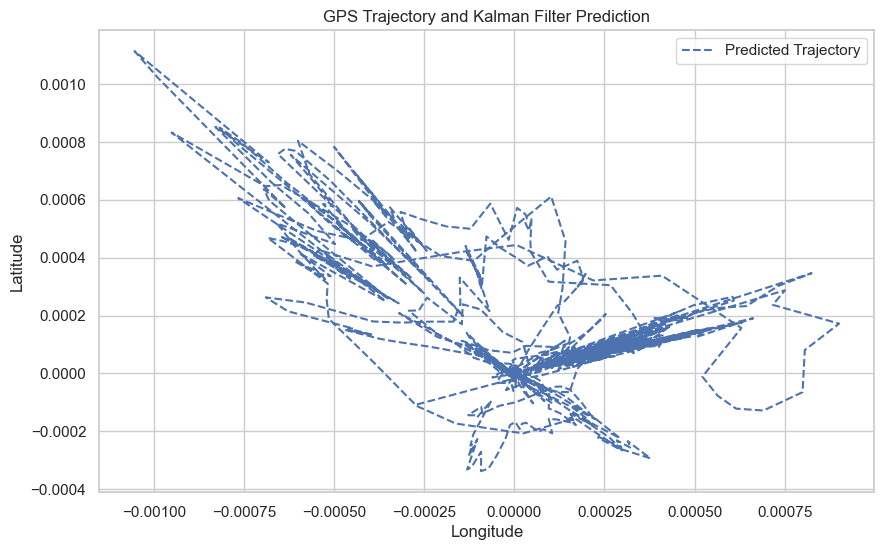

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise


my_id = ids[-2]
my_raw_data = df[df['ID']== my_id]
la   = [float(lat) for lat in my_raw_data['Latitude']]
lo   = [float(lon) for lon in my_raw_data['Longitude']]
incremental_list = [i+1 for i in range(1, len(la) + 1)]
#gps_points = np.column_stack((la, lo))
gps_points2 = np.column_stack((la, lo,incremental_list))

# Your GPS data structure (assuming it's filled with your data)
gps_data = gps_points2

# Calculate velocities for each component (simplified)
velocities_lat = []
velocities_lon = []
for i in range(1, len(gps_data)):
    lat1, lon1, t1 = gps_data[i-1]
    lat2, lon2, t2 = gps_data[i]
    distance_lat = lat2 - lat1  # Latitude change
    distance_lon = lon2 - lon1  # Longitude change
    time_diff = t2 - t1
    velocity_lat = distance_lat / time_diff
    velocity_lon = distance_lon / time_diff
    velocities_lat.append(velocity_lat)
    velocities_lon.append(velocity_lon)

# Initialize Kalman Filter for 2D prediction
kf = KalmanFilter(dim_x=4, dim_z=2)
kf.F = np.array([[1, 1, 0, 0],  # State transition matrix for 2D
                 [0, 1, 0, 0],
                 [0, 0, 1, 1],
                 [0, 0, 0, 1]])
kf.H = np.array([[1, 0, 0, 0],  # Measurement function for 2D
                 [0, 0, 1, 0]])
kf.Q = Q_discrete_white_noise(dim=2, dt=1, var=0.01, block_size=2)  # Process noise
kf.P *= 1000.  # Covariance matrix
kf.R = np.array([[0.5, 0],  # Measurement noise
                 [0, 0.5]])

# Predictions with updated Kalman Filter for 2D
predicted_positions = []
for lat_vel, lon_vel in zip(velocities_lat, velocities_lon):
    kf.predict()
    kf.update(np.array([lat_vel, lon_vel]))
    predicted_positions.append((kf.x[0], kf.x[2]))  # Extract predicted lat and lon

# Plotting
original_positions = [pos[:2] for pos in gps_data]  # Extract lat and lon from original data
original_lat, original_lon = zip(*original_positions)
predicted_lat, predicted_lon = zip(*predicted_positions)  # Now directly extracted from kf.x

plt.figure(figsize=(10, 6))
#plt.plot(original_lon, original_lat, label='Original Trajectory')
#plt.plot([l[0] for l in gps_points_scaled],[l[1] for l in gps_points_scaled], c='grey', label='Raw_'+str(len(la)))

plt.plot(predicted_lon, predicted_lat, label='Predicted Trajectory', linestyle='--')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Trajectory and Kalman Filter Prediction')
plt.legend()
plt.show()



In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def create_scatter_animation2(df, save_path, threshold):
    # Convert Longitude and Latitude columns to floats
    df[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']].astype(float)

    # Initialize figure and axes
    fig, ax = plt.subplots()

    # Define function to update plot for animation
    def update_plot(i):
        ax.clear()
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

        # Plot only the points up to the i-th frame
        for _, row in filtered_df.iloc[:i].iterrows():
            ax.set_title(row['Timestamp'])
            color  = 'red' if row['RSSI_1'] > threshold else 'gray'
            marker = 'o' if row['RSSI_1'] > threshold else 'X'
            ax.text(row['Longitude']+0.0001,row['Latitude']+0.0001, row['RSSI_1'], ha='center', va='bottom')
            ax.scatter(row['Longitude'], row['Latitude'], c=color, marker=marker)

        ax.set_xlim(df['Longitude'].min(), df['Longitude'].max())
        ax.set_ylim(df['Latitude'].min(), df['Latitude'].max())

    # Filter data based on RSSI_1 threshold
    filtered_df = df[df['RSSI_1'] > threshold]

    # Create animation
    ani = animation.FuncAnimation(fig, update_plot, frames=len(filtered_df), interval=200)

    # Save animation
    ani.save(f"{save_path}/scatter_animation.gif", writer='imagemagick')


C:\Users\juan.david\AppData\Local\Temp\ipykernel_27720\1648766287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']].astype(float)
MovieWriter imagemagick unavailable; using Pillow instead.
c:\Users\juan.david\AppData\Local\anaconda3\envs\sas\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


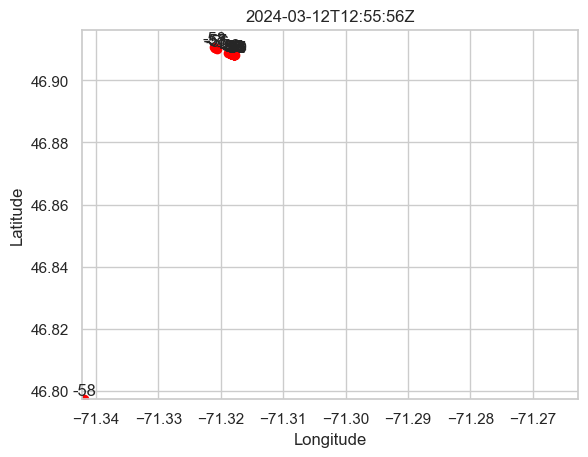

In [89]:
create_scatter_animation2(my_raw_data,'C:/Users/juan.david/projects/garda/data',-60)
#my_raw_data

In [90]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en km
    R = 6371.0

    # Convertir coordenadas de grados a radianes
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Diferencia de latitud y longitud
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calcular la distancia utilizando la fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def calculate_speed(df):
    # Calcular el tiempo de diferencia en segundos
    df['TimeDiff'] = pd.to_datetime(df['Timestamp']).diff().dt.total_seconds()

    # Convertir 'Latitude' y 'Longitude' a tipo float si son strings
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

    # Calcular la distancia en km utilizando la fórmula de Haversine
    distances = []
    for i in range(1, len(df)):
        try:
            lat1, lon1 = df['Latitude'].iloc[i-1], df['Longitude'].iloc[i-1]
        except:
            lat1, lon1 = df['Latitude'].iloc[i], df['Longitude'].iloc[i]
            
        lat2, lon2 = df['Latitude'].iloc[i], df['Longitude'].iloc[i]
        distance = haversine(lat1, lon1, lat2, lon2)
        distances.append(distance)
    distances.insert(0, 0)  # Insertar 0 para la primera fila
    df['Distance'] = distances

    # Calcular la velocidad
    df['Speed'] = df['Distance'] / df['TimeDiff']
    df.fillna(0, inplace=True)
    return df['Speed']


speed = calculate_speed(my_raw_data)
print(speed)

11       0.000000
20       0.000053
28       0.001338
43       0.001418
50       0.000982
           ...   
32896    0.000124
32902    0.000152
33030    0.000042
33053    0.000028
33111    0.000033
Name: Speed, Length: 1888, dtype: float64


C:\Users\juan.david\AppData\Local\Temp\ipykernel_27720\470809844.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDiff'] = pd.to_datetime(df['Timestamp']).diff().dt.total_seconds()
C:\Users\juan.david\AppData\Local\Temp\ipykernel_27720\470809844.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
C:\Users\juan.david\AppData\Local\Temp\ipykernel_27720\470809844.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of

C:\Users\juan.david\AppData\Local\Temp\ipykernel_27720\2120947807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_raw_data['Longitude'] = pd.to_numeric(df['Longitude'])
C:\Users\juan.david\AppData\Local\Temp\ipykernel_27720\2120947807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_raw_data['Latitude'] = pd.to_numeric(df['Latitude'])
C:\Users\juan.david\AppData\Local\Temp\ipykernel_27720\2120947807.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

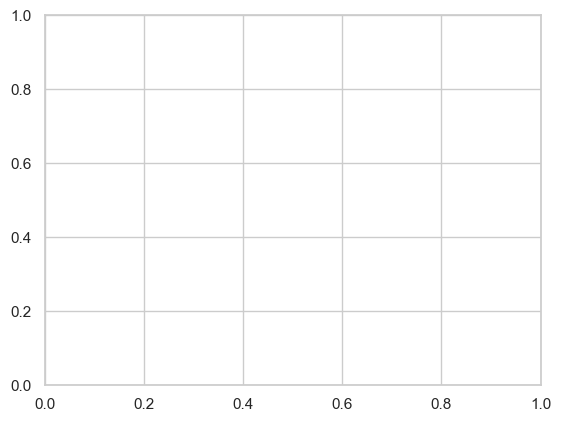

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Supongamos que ya tienes cargado tu DataFrame df

# Convertir las columnas de Longitud y Latitud en valores numéricos
my_raw_data['Longitude'] = pd.to_numeric(df['Longitude'])
my_raw_data['Latitude'] = pd.to_numeric(df['Latitude'])

# Convertir el campo Timestamp a tipo datetime si aún no lo está
my_raw_data['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filtrar el DataFrame por el campo Timestamp
# Supongamos que start_timestamp es el primer timestamp en tu DataFrame
start_timestamp = my_raw_data['Timestamp'].min()

# Crear un scatter plot
fig, ax = plt.subplots()

# Función para actualizar el scatter plot en la animación
def update(frame):
    ax.clear()
    df_temp = df[df['Timestamp'] == start_timestamp + pd.Timedelta(seconds=frame)]
    sns.scatterplot(data=df_temp[df_temp['RSSI_1'] > -60], x='Longitude', y='Latitude', ax=ax)
    for i in range(len(df_temp)):
        ax.text(df_temp.iloc[i]['Longitude'], df_temp.iloc[i]['Latitude'], df_temp.iloc[i]['ID'], fontsize=8)

# Definir la animación
ani = FuncAnimation(fig, update, frames=range(int((df['Timestamp'].max() - start_timestamp).seconds)), interval=100)

# Mostrar la animación
plt.show()
